In [ ]:
def dict_factory(cursor, row):
    fields = [column[0] for column in cursor.description]
    return {key: value for key, value in zip(fields, row)}

In [277]:
import sqlite3
import pandas as pd

import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations


# set plt parameters
plt.style.use('seaborn')

con = sqlite3.connect("../M1P5S1-SQL/superstore.db")
con.row_factory = dict_factory
cur = con.cursor()

In [ ]:
def run(sql):
    r = cur.execute(sql)
    return(r.fetchall())

In [ ]:
# to show all rows and columns 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

https://store.officeworld.com/register.asp

# Tasks
There are plenty of insights you can deduce from this dataset. Try to look for some these insights yourself. As a starting point, here are some ideas that you could present to the team:

* What customer purchasing patterns can you deduce? Such as during the days of the week, weekly, monthly, quarterly, yearly, etc.

* Are there specific days/months/quarters when the sales have been unusually high/low, and what could be the possible reasons? How about the profit and loss margin?

* Which states and which customers made the highest number of orders? Are they the same as the highest spending states and customers?

* Can you make a map showing the 5 states generating the most and least sales revenue?

* Can we see the quarterly revenue behavior?

* Can you create a plot showing the growth rate of new customers over the months?

* What do you think about the customers? Are they individuals or wholesalers? Why would you say so?

* Are there any issues with the dataset?

* You don't have to create all these plots. Choose the most relevant ones for your analysis.

Optional: make a small selection of the plots and try to present them as Plotly-Express animations. Please remember that the most important thing is to make a good analysis, independent of which library you use to create your graphs.

## What customer purchasing patterns can you deduce? Such as during the days of the week, weekly, monthly, quarterly, yearly, etc

In [278]:
data = (pd.DataFrame(run("""SELECT 
    *,
    sum(Sales) as TotalSales 
FROM  Purchase P
LEFT JOIN Cart C ON P.Cart_ID = C.ID
LEFT JOIN Customer CU ON P.Customer_ID = CU.ID
LEFT JOIN Product PR ON C.Product_ID = PR.ID
GROUP BY Order_Date
""")))

In [279]:
data.Order_Date.astype("datetime64[D]")
data = data.astype({
    'Order_Date': 'datetime64[D]',
    'Ship_Date': 'datetime64[D]'})

In [280]:
data.dtypes

Customer_ID                  int64
Order_Date          datetime64[ns]
Order_ID                    object
Cart_ID                      int64
Postal_Code                float64
Address_ID                   int64
Order_TwoLC                 object
Ship_Date           datetime64[ns]
Ship_Mode                   object
Order_Priority              object
Returned                     int64
ID                           int64
Row_ID                     float64
Product_ID                   int64
Quantity                   float64
Sales                      float64
Discount                   float64
Profit                     float64
Shipping_Cost              float64
Customer_Name               object
Segment                     object
Initials                    object
Version_ID                   int64
Product_Name                object
Category_ID                  int64
Unit_Price                 float64
Fixed_Unit_Price           float64
Original_Price             float64
Profit_Margin       

In [281]:
data.Segment.value_counts()

Consumer       662
Corporate      504
Home Office    264
Name: Segment, dtype: int64

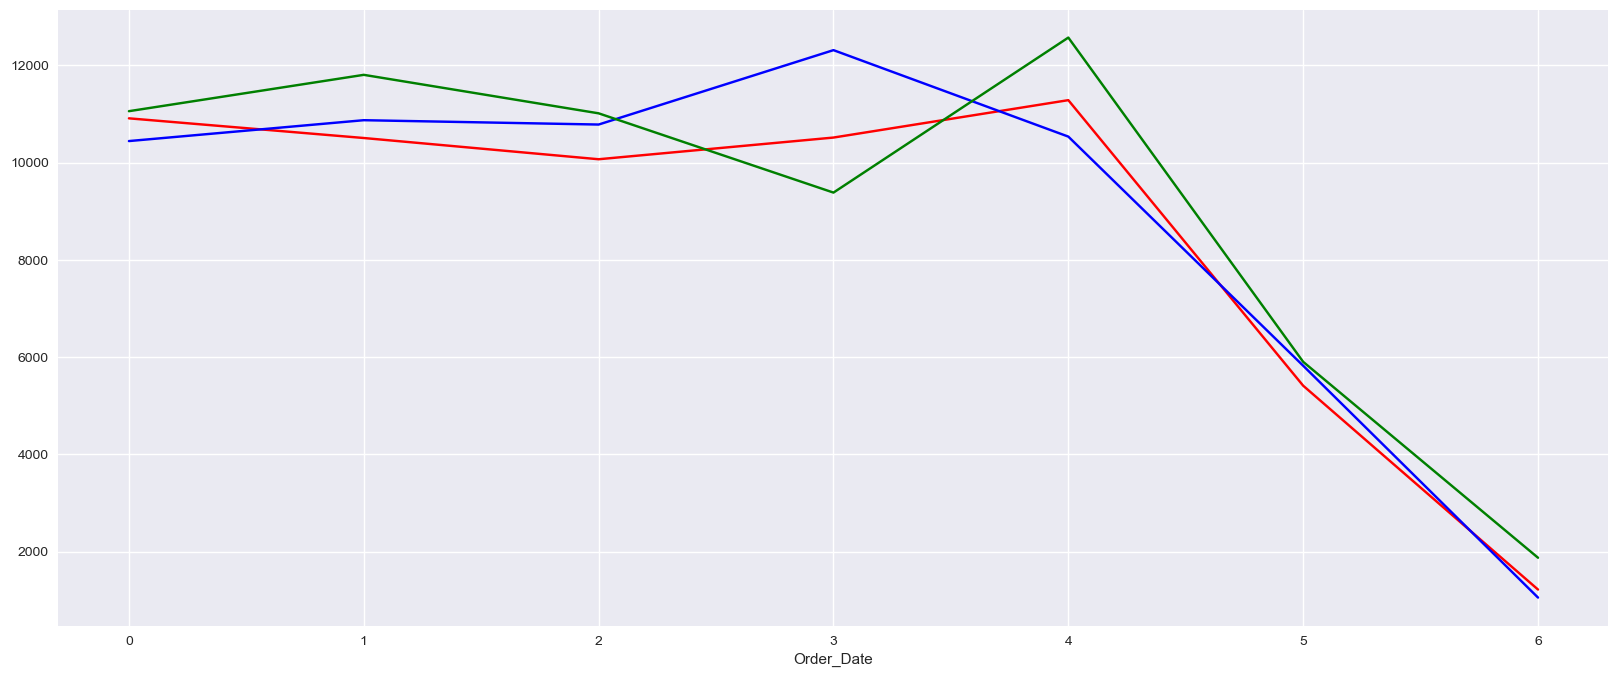

In [282]:
fig, axes = plt.subplots(1, 1, tight_layout=False, figsize = (20, 8))
#g = data.groupby([data.Order_Date.dt.year, data.Order_Date.dt.month])["TotalSales"].mean().plot.line(color="red")
g = data[data.Segment == "Consumer"].groupby([data.Order_Date.dt.weekday])["TotalSales"].mean().plot.line(color="red")
g = data[data.Segment == "Corporate"].groupby([data.Order_Date.dt.weekday])["TotalSales"].mean().plot.line(color="blue")
g = data[data.Segment == "Home Office"].groupby([data.Order_Date.dt.weekday])["TotalSales"].mean().plot.line(color="green")


In [283]:
data = (pd.DataFrame(run("""SELECT 
    *,
    sum(Sales) as TotalSales 
FROM  Purchase P
LEFT JOIN Cart C ON P.Cart_ID = C.ID
LEFT JOIN Customer CU ON P.Customer_ID = CU.ID
LEFT JOIN Product PR ON C.Product_ID = PR.ID
LEFT JOIN Address A ON P.Address_ID = A.ID
LEFT JOIN Country CO ON A.Country_ID = CO.ID
LEFT JOIN Category CA ON PR.Category_ID = CA.ID
LEFT JOIN Version V ON PR.Version_ID = V.ID
LEFT JOIN Manufacturer M ON PR.Manufacturer_ID = M.ID
GROUP BY Order_Date
""")))

data = data.astype({
    'Order_Date': 'datetime64[D]',
    'Ship_Date': 'datetime64[D]'})

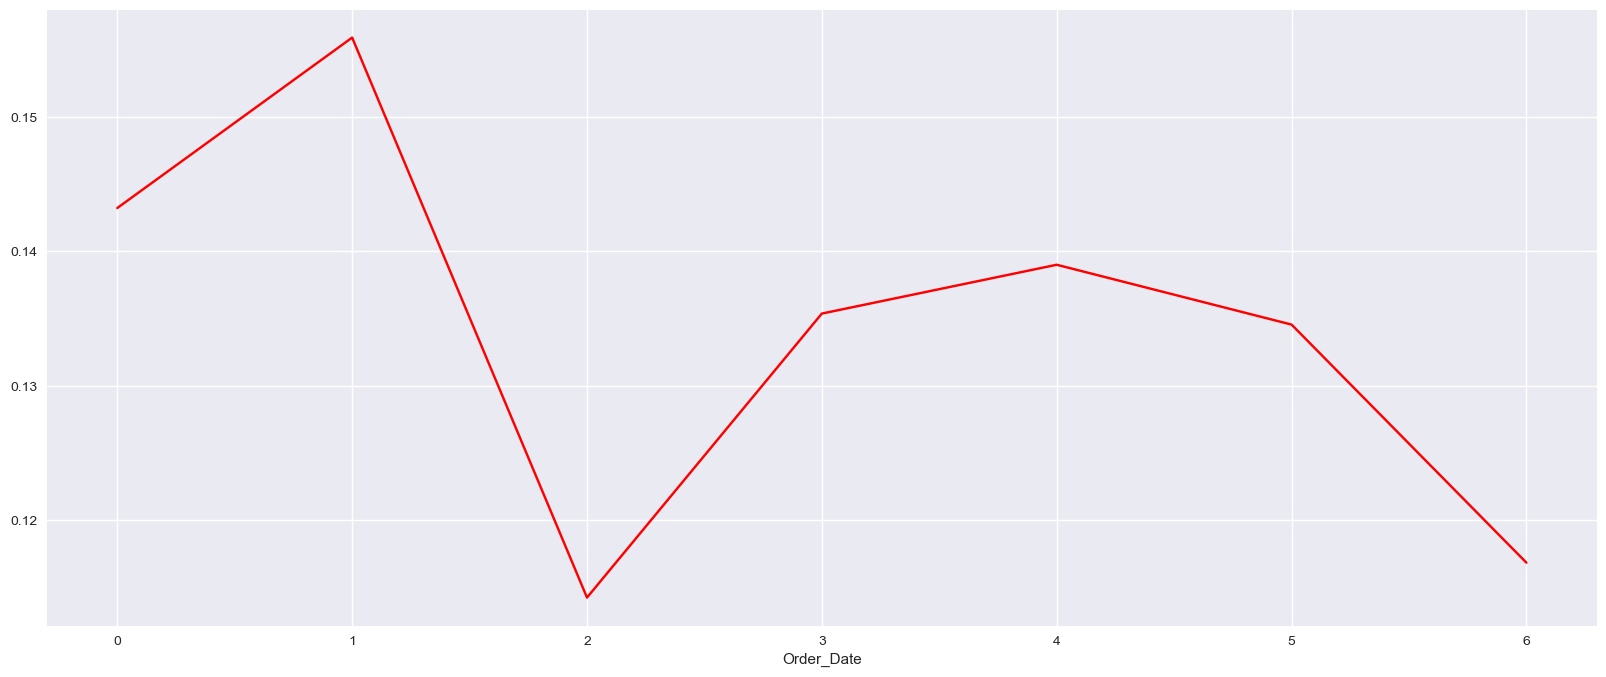

In [284]:
fig, axes = plt.subplots(1, 1, tight_layout=False, figsize = (20, 8))
#g = data.groupby([data.Order_Date.dt.year, data.Order_Date.dt.month])["TotalSales"].mean().plot.line(color="red")
g = data.groupby([data.Order_Date.dt.weekday])["Discount"].mean().plot.line(color="red")


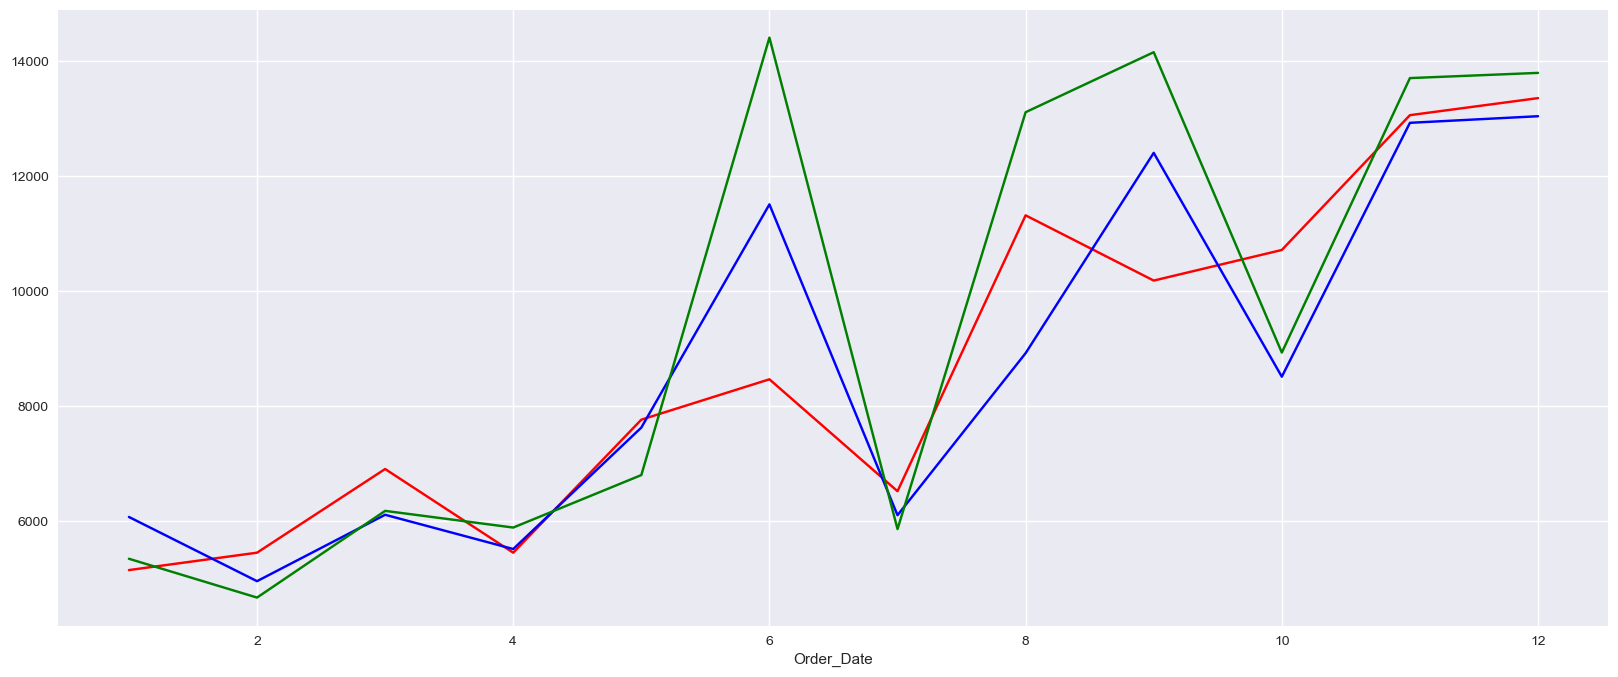

In [285]:
fig, axes = plt.subplots(1, 1, tight_layout=False, figsize = (20, 8))
#g = data.groupby([data.Order_Date.dt.year, data.Order_Date.dt.month])["TotalSales"].mean().plot.line(color="red")
g = data[(data.Country != "United States") & (data.Segment == "Consumer")].groupby([data.Order_Date.dt.month])["TotalSales"].mean().plot.line(color="red")
g = data[(data.Country != "United States") & (data.Segment == "Corporate")].groupby([data.Order_Date.dt.month])["TotalSales"].mean().plot.line(color="blue")
g = data[(data.Country != "United States") & (data.Segment == "Home Office")].groupby([data.Order_Date.dt.month])["TotalSales"].mean().plot.line(color="green")


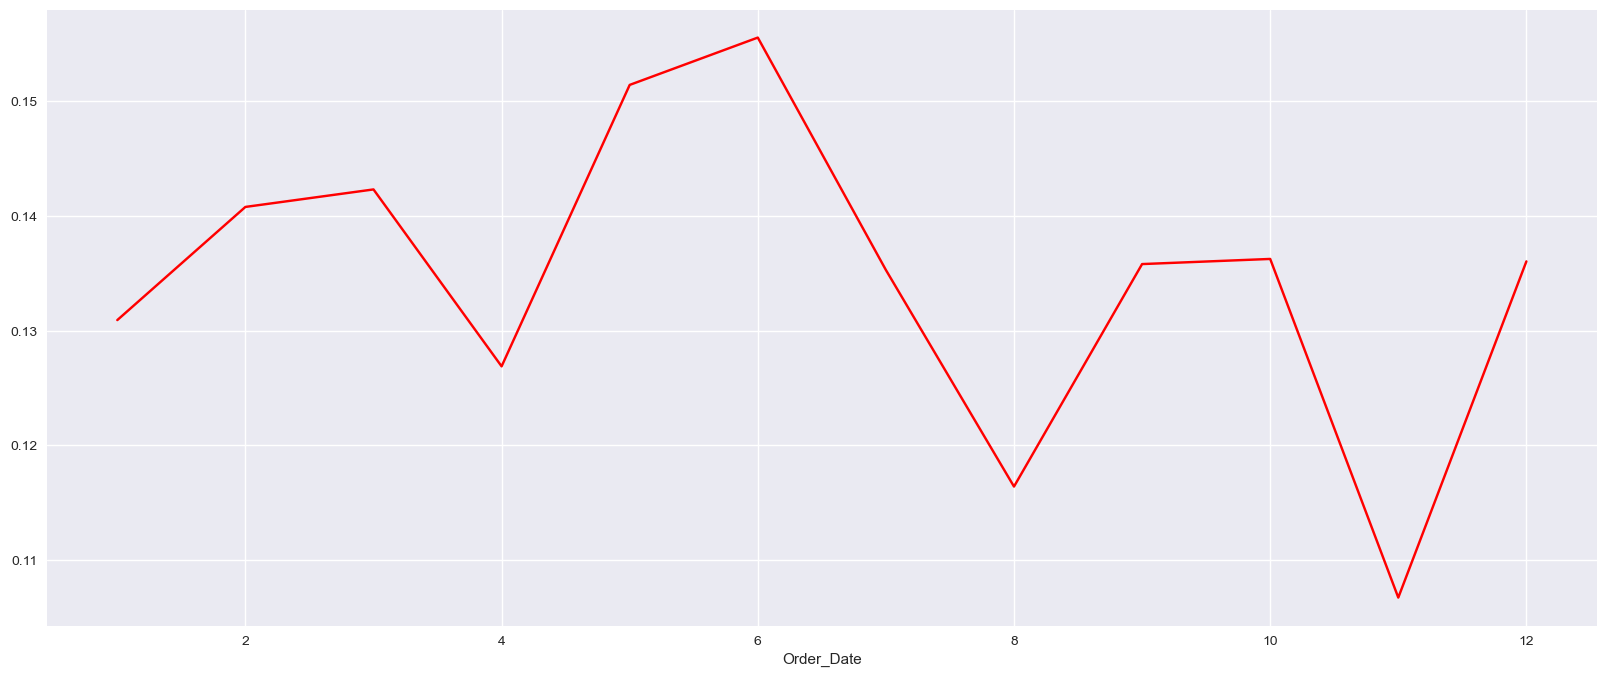

In [286]:
fig, axes = plt.subplots(1, 1, tight_layout=False, figsize = (20, 8))
#g = data.groupby([data.Order_Date.dt.year, data.Order_Date.dt.month])["TotalSales"].mean().plot.line(color="red")
g = data.groupby([data.Order_Date.dt.month])["Discount"].mean().plot.line(color="red")


In [ ]:
data.head(1)

In [287]:
data = (pd.DataFrame(run("""SELECT 
    *
FROM  Purchase P
LEFT JOIN Cart C ON P.Cart_ID = C.ID
LEFT JOIN Customer CU ON P.Customer_ID = CU.ID
LEFT JOIN Product PR ON C.Product_ID = PR.ID
LEFT JOIN Address A ON P.Address_ID = A.ID
LEFT JOIN Country CO ON A.Country_ID = CO.ID
LEFT JOIN Category CA ON PR.Category_ID = CA.ID
LEFT JOIN Version V ON PR.Version_ID = V.ID
LEFT JOIN Manufacturer M ON PR.Manufacturer_ID = M.ID

""")))

In [288]:
# Margin-Percentage
data[data.Profit == data.Profit.max()]
# 6998.64 - 2939.31 / 11 = 369,03 (== Einkaufspreis)
# 636,24 / 369,03 = 172% (Margin-Percentage)

,Customer_ID,Order_Date,Order_ID,Cart_ID,Postal_Code,Address_ID,Order_TwoLC,Ship_Date,Ship_Mode,Order_Priority,Returned,ID,Row_ID,Product_ID,Quantity,Sales,Discount,Profit,Shipping_Cost,Customer_Name,Segment,Initials,Version_ID,Product_Name,Category_ID,Unit_Price,Fixed_Unit_Price,Original_Price,Profit_Margin,Manufacturer_ID,City,State_ID,Country_ID,Region_ID,Country,Market,Category,SubCategory,Version,Manufacturer
47322,732,2013-10-03 00:00:00,118689,14739,47905.0,3472,CA,2013-10-10 00:00:00,Standard Class,Medium,0,23,38123.0,880,5.0,17499.95,0.0,8399.976,349.07,Tamara Chand,Corporate,TC,0,Canon imageCLASS 2200 Advanced Copier,15,3499.99,3499.99,1819.9948,192.0,23,Lafayette,452,140,3,United States,US,Technology,Copiers,None,Canon


In [289]:
data[data.Profit_Margin == data.Profit_Margin.min()].head()
# 642,992 - -932,568 / 14 = 112,54 (== Einkaufspreis)
# 1.607,48 - -932,568 / 14 = 181,432 (== Einkaufspreis / ohne Discount)
# sales / (1 - Discount) - Profit / Quantity 

,Customer_ID,Order_Date,Order_ID,Cart_ID,Postal_Code,Address_ID,Order_TwoLC,Ship_Date,Ship_Mode,Order_Priority,Returned,ID,Row_ID,Product_ID,Quantity,Sales,Discount,Profit,Shipping_Cost,Customer_Name,Segment,Initials,Version_ID,Product_Name,Category_ID,Unit_Price,Fixed_Unit_Price,Original_Price,Profit_Margin,Manufacturer_ID,City,State_ID,Country_ID,Region_ID,Country,Market,Category,SubCategory,Version,Manufacturer
133,2,2013-11-16 00:00:00,24412,15680,0.0,1778,ID,2013-11-21 00:00:00,Standard Class,Medium,0,87,21067.0,2984,2.0,205.740,0.25,-5.520,8.92,Aaron Hawkins,Corporate,AH,278,SAFCO Rocking Chair,2,137.16,137.16,137.16,100.0,87,Manila,706,102,12,Philippines,APAC,Furniture,Chairs,Set of Two,SAFCO
164,3,2012-11-15 00:00:00,6000,9006,0.0,542,SF,2012-11-20 00:00:00,Standard Class,Medium,0,42,43544.0,1433,1.0,137.340,0.00,0.000,10.12,Aaron Smayling,Corporate,AS,281,Fellowes File Cart,12,137.34,137.34,137.34,100.0,42,Cape Town,1083,117,1,South Africa,Africa,Office Supplies,Storage,Single Width,Fellowes
260,4,2014-10-11 00:00:00,83576,23026,0.0,2877,IN,2014-10-16 00:00:00,Second Class,Medium,0,38,30538.0,1333,1.0,11.880,0.40,0.570,0.83,Adam Bellavance,Home Office,AB,123,Enermax Memo Slips,11,19.80,19.80,19.80,100.0,38,Townsville,841,7,10,Australia,APAC,Office Supplies,Paper,8.5 x 11,Enermax
296,5,2012-09-13 00:00:00,3131770,7770,0.0,1991,ES,2012-09-17 00:00:00,Standard Class,Medium,0,79,12602.0,2679,5.0,446.400,0.00,0.000,15.70,Adam Hart,Corporate,AH,140,Office Star Steel Folding Chair,2,89.28,89.28,89.28,100.0,79,Namur,702,14,3,Belgium,EU,Furniture,Chairs,Black,Office
380,6,2012-12-26 00:00:00,2292455,9868,0.0,853,IT,2012-12-30 00:00:00,Standard Class,High,0,11,18923.0,345,5.0,70.575,0.50,-70.575,6.50,Adam Shillingsburg,Consumer,AS,263,Avery 3-Hole Punch,7,28.23,28.23,28.23,100.0,11,Dublin,306,62,8,Ireland,EU,Office Supplies,Binders,Recycled,Avery


In [ ]:
data[(data.Profit < 0) & (data.Country == "United States")].sort_values("Profit", ascending=True)[["Order_Date", "Row_ID", "Quantity", "Discount", "Sales", "Profit", "Customer_Name", "Segment", "Product_Name", "Unit_Price", "Original_Price", "Profit_Margin"]].head()

## Avg Shipping Cost per Order Speed

In [290]:
avgShippingCosts = (pd.DataFrame(run("""SELECT
    Ship_Mode,
    count(*) AS count,
    min(Shipping_Cost/Quantity) AS minShippingCost,
    max(Shipping_Cost/Quantity) AS maxShippingCost,
    avg(Shipping_Cost/Quantity) AS avgShippingCost
FROM Purchase P
LEFT JOIN Cart C ON P.Cart_ID = C.ID
LEFT JOIN Product PR ON C.Product_ID = PR.ID
LEFT JOIN Category CA ON PR.Category_ID = CA.ID
GROUP BY Ship_Mode
ORDER BY avgShippingCost DESC
""")))
display(avgShippingCosts.head(20))

,Ship_Mode,count,minShippingCost,maxShippingCost,avgShippingCost
0,Same Day,2716,0.002000,282.090,12.859161
1,First Class,7527,0.003333,362.785,12.417447
2,Second Class,10340,0.000000,363.870,8.873450
3,Standard Class,30905,0.000000,173.538,5.832079


## Avg Shipping Cost per SubCategory

In [292]:
avgShippingCosts = (pd.DataFrame(run("""SELECT
    SubCategory,
    count(*) AS count,
    min(Shipping_Cost/Quantity) AS minShippingCost,
    max(Shipping_Cost/Quantity) AS maxShippingCost,
    avg(Shipping_Cost/Quantity) AS avgShippingCost
FROM Purchase P
LEFT JOIN Cart C ON P.Cart_ID = C.ID
LEFT JOIN Product PR ON C.Product_ID = PR.ID
LEFT JOIN Category CA ON PR.Category_ID = CA.ID
GROUP BY SubCategory
ORDER BY avgShippingCost DESC
""")))
display(avgShippingCosts.head(20))

,SubCategory,count,minShippingCost,maxShippingCost,avgShippingCost
0,Tables,861,0.062500,362.785000,27.840865
1,Copiers,2223,0.190000,167.130000,21.375563
2,Bookcases,2447,0.165000,164.175000,19.384975
3,Appliances,1757,0.010000,214.415000,18.410811
4,Machines,1490,0.080000,235.610000,16.461335
5,Phones,3357,0.010000,285.830000,16.055879
6,Chairs,3470,0.070000,223.692500,13.714900
7,Accessories,3075,0.013333,133.367143,7.639525
8,Storage,5080,0.040000,86.245000,7.084733
9,Furnishings,3247,0.005556,44.905000,3.652612


## Why are some Shipping Costs 0 or 0.01?

In [293]:
lowShippingCosts = (pd.DataFrame(run("""SELECT
    *
FROM Purchase P
LEFT JOIN Cart C ON P.Cart_ID = C.ID
LEFT JOIN Product PR ON C.Product_ID = PR.ID
LEFT JOIN Customer CU ON P.Customer_ID = CU.ID
LEFT JOIN Category CA ON PR.Category_ID = CA.ID
WHERE Shipping_Cost < 0.02
""")))
display(lowShippingCosts.tail(10))

,Customer_ID,Order_Date,Order_ID,Cart_ID,Postal_Code,Address_ID,Order_TwoLC,Ship_Date,Ship_Mode,Order_Priority,Returned,ID,Row_ID,Product_ID,Quantity,Sales,Discount,Profit,Shipping_Cost,Version_ID,Product_Name,Category_ID,Unit_Price,Fixed_Unit_Price,Original_Price,Profit_Margin,Manufacturer_ID,Customer_Name,Segment,Initials,Category,SubCategory
0,653,2012-02-18 00:00:00,140767,4932,0.0,2951,MX,2012-02-22 00:00:00,Standard Class,Medium,0,7,9596.0,92,2.0,13.440,0.0,2.4000,0.00,182,Acco Index Tab,7,10.08,10.08,5.4600,185.0,3,Ross Baird,Home Office,RB,Office Supplies,Binders
1,540,2012-05-22 00:00:00,134460,5933,0.0,2834,MX,2012-05-26 00:00:00,Second Class,High,0,11,6147.0,1163,3.0,61.380,0.0,1.8000,0.00,123,Eaton Computer Printout Paper,11,30.69,30.69,16.5900,185.0,34,Mick Crebagga,Consumer,MC,Office Supplies,Paper
2,425,2012-12-28 00:00:00,100258,9945,0.0,1772,MX,2012-12-31 00:00:00,First Class,Medium,0,11,9922.0,3073,1.0,18.640,0.0,8.0000,0.01,123,SanDisk Message Books,11,27.96,27.96,14.2800,196.0,90,Katherine Murray,Home Office,KM,Office Supplies,Paper
3,453,2013-12-02 00:00:00,155768,16077,93030.0,3782,US,2013-12-02 00:00:00,Same Day,High,0,8,40470.0,6,3.0,22.920,0.0,11.2308,0.01,0,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",8,7.64,7.64,3.8964,196.0,1,Laurel Beltran,Home Office,LB,Office Supplies,Envelopes
4,422,2014-05-30 00:00:00,72327,19422,0.0,1717,IN,2014-05-30 00:00:00,Same Day,High,0,11,24105.0,1177,2.0,26.940,0.0,1.8600,0.01,256,Eaton Parchment Paper,11,13.47,13.47,12.5400,107.0,34,Katharine Harms,Corporate,KH,Office Supplies,Paper
5,428,2014-06-19 00:00:00,62366,20011,0.0,1544,IN,2014-06-19 00:00:00,Same Day,Medium,1,9,29002.0,242,5.0,65.100,0.0,4.5000,0.01,22,Advantus Thumb Tacks,9,13.02,13.02,12.5100,104.0,6,Katrina Edelman,Corporate,KE,Office Supplies,Fasteners
6,794,2014-06-20 00:00:00,102288,20051,77095.0,3641,US,2014-06-24 00:00:00,Standard Class,Medium,0,5,35398.0,1950,1.0,0.444,0.8,-1.1100,0.01,0,Hoover Replacement Belt for Commercial Guardsm...,5,2.22,2.22,1.5540,143.0,55,Zuschuss Carroll,Consumer,ZC,Office Supplies,Appliances
7,218,2014-08-05 00:00:00,57662,20995,0.0,2877,IN,2014-08-10 00:00:00,Standard Class,Medium,0,7,24175.0,404,5.0,58.050,0.1,19.9500,0.01,182,Avery Binder,7,12.90,12.90,7.8900,163.0,11,Deborah Brumfield,Home Office,DB,Office Supplies,Binders


## What is the most stupid stuff that was ordered Same Day?

In [294]:
stupidOrders = (pd.DataFrame(run("""SELECT 
    *
FROM  Purchase P
LEFT JOIN Cart C ON P.Cart_ID = C.ID
LEFT JOIN Product PR ON C.Product_ID = PR.ID
LEFT JOIN Category CA ON PR.Category_ID = CA.ID
LEFT JOIN Address A ON P.Address_ID = A.ID
WHERE Ship_Mode = "Same Day"
  AND Category = "Furniture"
""")))

display(stupidOrders.sort_values("Unit_Price", ascending=False).head())
stupidOrders.describe()


,Customer_ID,Order_Date,Order_ID,Cart_ID,Postal_Code,Address_ID,Order_TwoLC,Ship_Date,Ship_Mode,Order_Priority,Returned,ID,Row_ID,Product_ID,Quantity,Sales,Discount,Profit,Shipping_Cost,Version_ID,Product_Name,Category_ID,Unit_Price,Fixed_Unit_Price,Original_Price,Profit_Margin,Manufacturer_ID,Category,SubCategory,City,State_ID,Country_ID,Region_ID
370,575,2012-05-07 00:00:00,86698,5751,0.0,2028,IN,2012-05-07 00:00:00,Same Day,High,0,2028,31278.0,614,2.0,1847.520,0.00,738.9600,545.89,317,Bevis Conference Table,4,923.76,923.76,554.2800,167.0,16,Furniture,Tables,Newcastle,719,7,10
27,45,2011-09-02 00:00:00,0,2425,0.0,2996,AU,2011-09-02 00:00:00,Same Day,Critical,0,2996,42837.0,1859,1.0,922.950,0.00,341.4900,282.09,200,Hon Conference Table,4,922.95,922.95,581.4600,159.0,53,Furniture,Tables,Vienna,1060,8,5
224,383,2012-10-15 00:00:00,139731,8382,79109.0,3667,CA,2012-10-15 00:00:00,Same Day,High,0,3667,32735.0,1666,5.0,2453.430,0.30,-350.4900,690.42,0,HON 5400 Series Task Chairs for Big and Tall,2,700.98,700.98,560.7840,125.0,48,Furniture,Chairs,Amarillo,1008,140,3
442,672,2012-10-31 00:00:00,164882,8642,92374.0,3764,CA,2012-10-31 00:00:00,Same Day,Critical,0,3764,33412.0,1070,1.0,425.833,0.15,20.0392,150.07,0,DMI Eclipse Executive Suite Bookcases,1,500.98,500.98,405.7938,123.0,1,Furniture,Bookcases,Redlands,194,140,13
151,275,2013-09-20 00:00:00,156097,14373,60505.0,3559,US,2013-09-20 00:00:00,Same Day,Medium,0,3559,31954.0,1601,2.0,701.372,0.30,-50.0980,52.31,0,Global Troy Executive Leather Low-Back Tilter,2,500.98,500.98,375.7350,133.0,46,Furniture,Chairs,Aurora,449,140,3


,Customer_ID,Cart_ID,Postal_Code,Address_ID,Returned,ID,Row_ID,Product_ID,Quantity,Sales,Discount,Profit,Shipping_Cost,Version_ID,Category_ID,Unit_Price,Fixed_Unit_Price,Original_Price,Profit_Margin,Manufacturer_ID,State_ID,Country_ID,Region_ID
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.00000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,413.061896,13029.150870,13760.079304,2033.893617,0.042553,2033.893617,25172.21470,2048.301741,3.535783,387.291896,0.162515,36.501308,67.295222,174.636364,2.208897,147.127311,147.413211,111.043637,138.777563,56.926499,568.168279,82.866538,7.117988
std,220.442552,7426.775582,29004.785322,1156.657424,0.202043,1156.657424,14761.78663,931.093592,2.135247,472.133494,0.194896,188.498604,102.286488,90.066165,0.895119,140.721075,141.172775,108.021684,26.122083,29.636532,320.346640,47.775553,3.821553
min,2.000000,59.000000,0.000000,1.000000,0.000000,1.000000,46.00000,12.000000,1.000000,5.820000,0.000000,-2211.165000,0.050000,0.000000,1.000000,2.910000,2.910000,1.542300,100.000000,1.000000,4.000000,3.000000,1.000000
25%,245.000000,6716.000000,0.000000,1111.000000,0.000000,1111.000000,12335.00000,1188.000000,2.000000,85.020000,0.000000,-6.676000,10.220000,129.000000,1.000000,50.160000,50.160000,36.360000,118.000000,32.000000,307.000000,45.000000,3.000000
50%,425.000000,12786.000000,0.000000,1915.000000,0.000000,1915.000000,26496.00000,2027.000000,3.000000,217.200000,0.100000,15.820000,31.730000,185.000000,2.000000,110.980000,110.980000,79.500000,135.000000,53.000000,578.000000,82.000000,8.000000
75%,596.000000,19322.000000,0.000000,3147.000000,0.000000,3147.000000,37232.00000,2928.000000,5.000000,496.440000,0.270000,71.928000,77.250000,248.000000,3.000000,170.340000,170.340000,139.500000,156.000000,86.000000,847.000000,140.000000,11.000000
max,795.000000,25746.000000,98115.000000,3838.000000,1.000000,3838.000000,51119.00000,3600.000000,14.000000,2953.584000,0.700000,1015.020000,810.250000,317.000000,4.000000,923.760000,923.760000,581.460000,200.000000,103.000000,1102.000000,144.000000,13.000000


## Timediff between Order and Send Date for different Ship Modes

In [295]:
timeDelta = (pd.DataFrame(run("""SELECT
    Ship_Mode,
    count(*) AS count,
    min(Diff) AS MinDiff,
    max(Diff) AS MaxDiff,
    avg(Diff) As AvgDiff
FROM ( SELECT 
    Ship_Mode,
    JULIANDAY(Ship_Date) - JULIANDAY(Order_Date) AS Diff
FROM Purchase P
) GROUP BY Ship_Mode
ORDER BY AvgDiff DESC
""")))

display(timeDelta)

,Ship_Mode,count,MinDiff,MaxDiff,AvgDiff
0,Standard Class,15412,4.0,7.0,5.002920
1,Second Class,5146,2.0,5.0,3.219977
2,First Class,3847,1.0,3.0,2.189238
3,Same Day,1349,0.0,1.0,0.042254


## AVG(Address) per Customer

In [296]:
avgAmountAddresses = (pd.DataFrame(run("""
SELECT 
    Segment,
    MIN(countAdresses) AS minCountAdresses,
    MAX(countAdresses) AS maxCountAdresses,
    AVG(countAdresses) AS avgCountAdresses
FROM (
SELECT
    Segment,
    COUNT(DISTINCT(Address_ID)) AS countAdresses
FROM Purchase P
LEFT JOIN Customer C ON P.Customer_ID = C.ID
GROUP BY Customer_ID)
GROUP BY Segment
""")))

display(avgAmountAddresses.head())

,Segment,minCountAdresses,maxCountAdresses,avgCountAdresses
0,Consumer,17,47,31.797066
1,Corporate,15,47,31.777311
2,Home Office,18,46,31.168919


## Sara Luxemburg is supposed to work at Home Office but has 45 Addresses she sents stuff to

In [297]:
(pd.DataFrame(run("""SELECT
    Country,
    GROUP_CONCAT(DISTINCT(City)) AS Cities,
    COUNT(*) AS count
FROM Purchase P
LEFT JOIN Customer C ON P.Customer_ID = C.ID
LEFT JOIN Address A ON P.Address_ID = A.ID
LEFT JOIN Country CO ON A.Country_ID = CO.ID
WHERE Segment = "Home Office"
AND Customer_Name = "Sara Luxemburg"
GROUP BY Country
ORDER BY count DESC
""")))

,Country,Cities,count
0,United States,"New York City,Durham,Jacksonville,Muskogee,Hou...",7
1,France,"Les Ulis,Montgeron,Sartrouville",3
2,El Salvador,"Ilopango,Mejicanos,San Salvador",3
3,Brazil,"Brumado,São Paulo,Vespasiano",3
4,United Kingdom,"Halesowen,Woking",2
5,Ukraine,"Donets'k,Rivne",2
6,Turkey,"Kartal,Polatli",2
7,Spain,"Madrid,Valencia",2
8,South Africa,"East London,Soweto",2
9,Nicaragua,"Managua,Masaya",2


## Theoretical/Real Profit Margin

In [298]:
test = (pd.DataFrame(run("""SELECT 
    Category,
    SubCategory,
    count(*) as count,
    min(Profit_Margin) as minProfitMargin,
    max(Profit_Margin) as maxProfitMargin,
    avg(Profit_Margin) as avgProfitMargin,
    sum(Sales) AS totalSales,
    sum(Original_Price * Quantity) AS totalCosts,
    (sum(Sales) * 100 / sum(Original_Price * Quantity)) as realProfitMargin,
    avg(Profit_Margin) - (sum(Sales) * 100 / sum(Original_Price * Quantity)) as ProfitMarginDiff
FROM  Purchase P
LEFT JOIN Cart C ON P.Cart_ID = C.ID
LEFT JOIN Product PR ON C.Product_ID = PR.ID
LEFT JOIN Category CA ON PR.Category_ID = CA.ID
GROUP BY Category, SubCategory

""")))

display(test.sort_values("avgProfitMargin", ascending=False))


,Category,SubCategory,count,minProfitMargin,maxProfitMargin,avgProfitMargin,totalSales,totalCosts,realProfitMargin,ProfitMarginDiff
10,Office Supplies,Paper,3538,100.0,200.0,159.493782,2.442917e+05,1.995782e+05,122.404012,37.089770
6,Office Supplies,Binders,6170,100.0,200.0,154.158347,4.622312e+05,4.064958e+05,113.711192,40.447155
9,Office Supplies,Labels,2606,100.0,200.0,147.603223,7.340403e+04,6.385318e+04,114.957520,32.645703
7,Office Supplies,Envelopes,2435,100.0,200.0,147.508419,1.709043e+05,1.564441e+05,109.243023,38.265395
8,Office Supplies,Fasteners,2426,100.0,200.0,144.844600,8.328443e+04,7.799852e+04,106.776928,38.067672
2,Furniture,Furnishings,3247,100.0,200.0,142.456113,3.874637e+05,3.759622e+05,103.059236,39.396877
4,Office Supplies,Appliances,1757,100.0,200.0,139.710302,1.011112e+06,9.450253e+05,106.993133,32.717168
13,Technology,Accessories,3075,100.0,200.0,139.588943,7.492370e+05,6.802649e+05,110.139007,29.449936
14,Technology,Copiers,2223,100.0,200.0,139.151147,1.509436e+06,1.386219e+06,108.888744,30.262403
0,Furniture,Bookcases,2447,101.0,200.0,138.530037,1.476133e+06,1.425227e+06,103.571791,34.958245


## Repetitive Customers per Segment
How many times has a customer send something to the same address?

In [223]:
repeat = (pd.DataFrame(run("""
SELECT 
    Segment,
    count(*) as Customers,
    MIN(Count) as minCount,
    MAX(Count) as maxCount,
    AVG(Count) as avgCount
FROM (
    SELECT
        Segment,
        Address_ID, 
        Customer_ID,
        count(*) as count
    FROM Purchase P
    LEFT JOIN Customer C ON P.Customer_ID = C.ID
    GROUP BY Address_ID, Customer_ID
)
GROUP BY Segment
""")))

display(repeat.head())


,Segment,Customers,minCount,maxCount,avgCount
0,Consumer,13005,1,3,1.023068
1,Corporate,7563,1,3,1.022346
2,Home Office,4613,1,3,1.022545


## Repetitive Customers grouped by Orders 
How many times has a customer send something to the same address?

In [244]:
repeat = (pd.DataFrame(run("""
SELECT
    Purchases as AmountOfPurchases, 
    count(*) as AmountOfCustomers
FROM (
    SELECT
        Segment,
        Address_ID, 
        Customer_ID,
        count(*) as Purchases
    FROM Purchase P
    LEFT JOIN Customer C ON P.Customer_ID = C.ID
    GROUP BY Address_ID, Customer_ID
)
GROUP BY Purchases
""")))

display(repeat.head())


,AmountOfPurchases,AmountOfCustomers
0,1,24629
1,2,531
2,3,21


## How many Orders per Customer?

In [245]:
repeat = (pd.DataFrame(run("""
SELECT
    Purchases as AmountOfPurchases, 
    count(*) as AmountOfCustomers
FROM (
    SELECT
        Segment,
        Address_ID, 
        Customer_ID,
        count(*) as Purchases
    FROM Purchase P
    LEFT JOIN Customer C ON P.Customer_ID = C.ID
    GROUP BY Customer_ID
)
GROUP BY Purchases
ORDER BY AmountOfPurchases DESC
""")))

display(repeat)


,AmountOfPurchases,AmountOfCustomers
0,47,3
1,46,3
2,45,10
3,44,2
4,43,11
5,42,11
6,41,19
7,40,23
8,39,26
9,38,40


## Customers with the least amount of Purchases

In [269]:
repeat = (pd.DataFrame(run("""

    SELECT
        Customer_Name,
        Segment,
        sum(Quantity) AS totalQuantity,
        sum(Sales) As totalSales,
        sum(Profit) AS totalProfit,
        count(distinct(Row_ID)) AS Orders,
        count(distinct(Cart_ID)) AS Purchases
    FROM Purchase P
    LEFT JOIN Customer CU ON P.Customer_ID = CU.ID
    LEFT JOIN Cart C ON P.Cart_ID = C.ID
    GROUP BY Customer_ID
    ORDER BY Purchases ASC

""")))

display(repeat.head())


,Customer_Name,Segment,totalQuantity,totalSales,totalProfit,Orders,Purchases
0,Darren Budd,Corporate,98.0,9679.23920,586.96490,31,15
1,Michael Oakman,Consumer,79.0,5460.58400,286.25860,29,17
2,Nicole Brennan,Corporate,93.0,5935.07540,-691.42780,31,17
3,David Bremer,Corporate,116.0,6273.82662,-2270.69658,34,20
4,Paul Knutson,Home Office,126.0,8231.03756,-308.48944,39,20


## Customers with the least amount of Purchases

In [268]:
repeat = (pd.DataFrame(run("""

    SELECT
        Customer_Name,
        Segment,
        sum(Quantity) AS totalQuantity,
        sum(Sales) As totalSales,
        sum(Profit) AS totalProfit,
        count(distinct(Row_ID)) AS Orders,
        count(distinct(Cart_ID)) AS Purchases
    FROM Purchase P
    LEFT JOIN Customer CU ON P.Customer_ID = CU.ID
    LEFT JOIN Cart C ON P.Cart_ID = C.ID
    GROUP BY Customer_ID
    ORDER BY Orders ASC

""")))

display(repeat.head())


,Customer_Name,Segment,totalQuantity,totalSales,totalProfit,Orders,Purchases
0,Michael Oakman,Consumer,79.0,5460.58400,286.25860,29,17
1,Darren Budd,Corporate,98.0,9679.23920,586.96490,31,15
2,Nicole Brennan,Corporate,93.0,5935.07540,-691.42780,31,17
3,David Bremer,Corporate,116.0,6273.82662,-2270.69658,34,20
4,Andy Reiter,Consumer,89.0,8545.55050,3139.08330,35,23


## Customer with the highest Profit

In [276]:
repeat = (pd.DataFrame(run("""

    SELECT
        Customer_Name,
        Customer_ID,
        Segment,
        sum(Quantity) AS totalQuantity,
        count(distinct(Row_ID)) AS Orders,
        count(distinct(Cart_ID)) AS Purchases,
        sum(Sales) As totalSales,
        sum(Profit) AS totalProfit
    FROM Purchase P
    LEFT JOIN Customer CU ON P.Customer_ID = CU.ID
    LEFT JOIN Cart C ON P.Cart_ID = C.ID
    GROUP BY Customer_ID
    ORDER BY Purchases DESC

""")))

display(repeat.head())


,Customer_Name,Customer_ID,Segment,totalQuantity,Orders,Purchases,totalSales,totalProfit
0,Michael Paige,531,Corporate,314.0,94,47,17795.5907,1632.6950
1,Frank Olsen,287,Consumer,296.0,85,47,17772.6615,3023.7504
2,Anna Andreadi,43,Consumer,302.0,91,47,17312.2147,2443.0930
3,Sara Luxemburg,677,Home Office,250.0,82,46,16832.4710,1899.9305
4,Laura Armstrong,452,Corporate,323.0,86,46,27862.4419,3962.3098


## Which are the top 10 addresses (by amount of Orders)

In [236]:
repeat = (pd.DataFrame(run("""
SELECT    
    Address_ID, 
    City,
    Country,
    sum(Sales) as totalSales,
    sum(Profit) as totalProfit,
    count(*) as countOrders
FROM Purchase P
LEFT JOIN Address A ON P.Address_ID = A.ID
LEFT JOIN Country CO ON A.Country_ID = CO.ID
LEFT JOIN Cart C ON P.Cart_ID = C.ID
GROUP BY Address_ID
ORDER BY countOrders DESC
""")))

display(repeat.head())


,Address_ID,City,Country,totalSales,totalProfit,countOrders
0,2546,Santo Domingo,Dominican Republic,78713.66344,-3569.59656,443
1,1778,Manila,Philippines,120886.94850,-11158.56150,432
2,2798,Tegucigalpa,Honduras,48048.90392,-15007.41608,362
3,1330,Jakarta,Indonesia,94321.32420,3826.98420,337
4,1772,Managua,Nicaragua,83707.49804,17853.71804,336


## MaxProfit

In [216]:
data[data.Profit == data.Profit.max()]
# 6998.64 - 2939.31 / 11 = 369,03 (== Einkaufspreis)

,Customer_ID,Order_Date,Order_ID,Cart_ID,Address_ID,Order_TwoLC,Ship_Date,Ship_Mode,Order_Priority,Returned,ID,Row_ID,Product_ID,Quantity,Sales,Discount,Profit,Shipping_Cost,Postal_Code,City,State,Country_ID,Region_ID,Country,Market,Customer_Name,Segment,Initials,Version_ID,Product_Name,Category_ID,Unit_Price,Fixed_Unit_Price,Original_Price,Profit_Margin,Manufacturer_ID,Category,SubCategory
9,15,2014-12-12 00:00:00,9730,25081,1571,NI,2014-12-16 00:00:00,Standard Class,Medium,0,7,46811.0,87,1.0,2.448,0.7,-1.902,0.06,0.0,Lagos,Lagos,95,1,Nigeria,Africa,Alan Schoenberger,Corporate,AS,177,Acco Hole Reinforcements,7,8.16,8.16,4.35,188.0,3,Office Supplies,Binders


## MaxProfitMargin

In [217]:
data[data.Profit_Margin == data.Profit_Margin.max()]

,Customer_ID,Order_Date,Order_ID,Cart_ID,Address_ID,Order_TwoLC,Ship_Date,Ship_Mode,Order_Priority,Returned,ID,Row_ID,Product_ID,Quantity,Sales,Discount,Profit,Shipping_Cost,Postal_Code,City,State,Country_ID,Region_ID,Country,Market,Customer_Name,Segment,Initials,Version_ID,Product_Name,Category_ID,Unit_Price,Fixed_Unit_Price,Original_Price,Profit_Margin,Manufacturer_ID,Category,SubCategory
7,13,2012-02-14 00:00:00,9700,4883,1571,NI,2012-02-17 00:00:00,First Class,Medium,0,14,49569.0,583,1.0,12.213,0.7,-8.967,0.81,0.0,Lagos,Lagos,95,1,Nigeria,Africa,Alan Haines,Corporate,AH,148,Belkin Mouse,14,40.71,40.71,21.18,192.0,15,Technology,Accessories


# Analysis
* Check AvgDiscount for Turkey and Nigeria (!)
* China and India have less then 5% of discount

In [201]:
data = pd.DataFrame(run("""SELECT 
        Country,
        count(*) as Purchases,
        avg(Quantity) as AvgQuantity,
        sum(Quantity) as SumQuantity,
        sum(CASE WHEN Discount > 0 THEN 1 ELSE 0 END) as CountDiscount,
        ROUND(SUM(CASE WHEN Discount > 0 THEN 1 ELSE 0 END) / CAST(COUNT(*) AS float) * 100) AS PercentageDiscount,
        avg(Discount) as AvgDiscount,
        sum(Sales) as SumSales,
        sum(Profit) as SumProfit,
        avg(Profit_Margin) as AvgProfitMargin
        FROM Purchase P
    LEFT JOIN Cart C ON P.Cart_ID = C.ID
    LEFT JOIN Customer CU ON P.Customer_ID = CU.ID
    LEFT JOIN Product PR ON C.Product_ID = PR.ID
    LEFT JOIN Address A ON P.Address_ID = A.ID
    LEFT JOIN Country CO ON A.Country_ID = CO.ID
    LEFT JOIN Category CA ON PR.Category_ID = CA.ID
    GROUP BY Country
    HAVING PercentageDiscount < 5 AND Purchases > 100
    ORDER BY Purchases DESC

    LIMIT 100"""))

display(data)

,Country,Purchases,AvgQuantity,SumQuantity,CountDiscount,PercentageDiscount,AvgDiscount,SumSales,SumProfit,AvgProfitMargin
0,China,1880,3.766489,7081.0,67,4.0,0.014309,700562.025,150683.085,138.075532
1,India,1555,3.702894,5758.0,55,4.0,0.017685,589650.105,129071.835,138.257878
2,Iran,607,2.296540,1394.0,0,0.0,0.000000,113746.110,26856.240,137.420099
3,Egypt,487,2.305955,1123.0,0,0.0,0.000000,84139.320,19702.230,137.542094
4,South Africa,461,2.251627,1038.0,0,0.0,0.000000,95292.270,21936.630,138.219089
5,Morocco,451,2.268293,1023.0,0,0.0,0.000000,87077.940,22761.420,139.079823
6,Iraq,388,2.211340,858.0,0,0.0,0.000000,70714.800,18243.210,137.293814
7,Russia,384,2.388021,917.0,0,0.0,0.000000,82913.880,22536.450,138.960938
8,Canada,384,2.169271,833.0,0,0.0,0.000000,66928.170,17817.390,137.843750
9,Ukraine,381,2.493438,950.0,0,0.0,0.000000,86857.170,20944.230,139.123360


In [195]:
data = pd.DataFrame(run("""SELECT 
        Country,
        count(*) as Purchases,
        avg(Quantity) as AvgQuantity,
        sum(Quantity) as SumQuantity,
        sum(CASE WHEN Discount > 0 THEN 1 ELSE 0 END) as CountDiscount,
        ROUND(SUM(CASE WHEN Discount > 0 THEN 1 ELSE 0 END) / CAST(COUNT(*) AS float) * 100) AS PercentageDiscount,
        avg(Discount) as AvgDiscount,
        sum(Sales) as SumSales,
        sum(Profit) as SumProfit,
        avg(Profit_Margin) as AvgProfitMargin
        FROM Purchase P
    LEFT JOIN Cart C ON P.Cart_ID = C.ID
    LEFT JOIN Customer CU ON P.Customer_ID = CU.ID
    LEFT JOIN Product PR ON C.Product_ID = PR.ID
    LEFT JOIN Address A ON P.Address_ID = A.ID
    LEFT JOIN Country CO ON A.Country_ID = CO.ID
    LEFT JOIN Category CA ON PR.Category_ID = CA.ID
    GROUP BY Country
    HAVING PercentageDiscount = 100 AND AvgDiscount >= 0.7
    ORDER BY Purchases DESC

    LIMIT 10"""))

display(data)

,Country,Purchases,AvgQuantity,SumQuantity,CountDiscount,PercentageDiscount,AvgDiscount,SumSales,SumProfit,AvgProfitMargin
0,Nigeria,905,2.271823,2056.0,905,100.0,0.7,54350.352,-80750.718,138.975691
1,Kazakhstan,101,2.069307,209.0,101,100.0,0.7,4605.444,-7099.896,141.277228
2,Zimbabwe,80,2.375000,190.0,80,100.0,0.7,3765.105,-5428.785,136.987500
3,United Arab Emirates,14,2.642857,37.0,14,100.0,0.7,744.120,-1036.860,136.357143


In [203]:
for group in ["Segment", "Category", "SubCategory", "Customer_Name", "Country", "Market", "Product_Name", "Order_Priority", "Manufacturer"]:

    data = (pd.DataFrame(run("""SELECT
        """ + group + """,
        count(*) as Purchases,
        avg(Quantity) as AvgQuantity,
        sum(Quantity) as SumQuantity,
        sum(CASE WHEN Discount > 0 THEN 1 ELSE 0 END) as CountDiscount,
        ROUND(SUM(CASE WHEN Discount > 0 THEN 1 ELSE 0 END) / CAST(COUNT(*) AS float) * 100) AS PercentageDiscount,
        avg(Discount) as AvgDiscount,
        sum(Sales) as SumSales,
        sum(Profit) as SumProfit,
        avg(Profit_Margin) as AvgProfitMargin
    FROM Purchase P
    LEFT JOIN Cart C ON P.Cart_ID = C.ID
    LEFT JOIN Customer CU ON P.Customer_ID = CU.ID
    LEFT JOIN Product PR ON C.Product_ID = PR.ID
    LEFT JOIN Address A ON P.Address_ID = A.ID
    LEFT JOIN Country CO ON A.Country_ID = CO.ID
    LEFT JOIN Category CA ON PR.Category_ID = CA.ID
    LEFT JOIN Manufacturer M ON PR.Manufacturer_ID = M.ID
    GROUP BY """ + group + """
    ORDER BY Purchases DESC
    LIMIT 20
    """)))
    print(group)
    display(data)


Segment


,Segment,Purchases,AvgQuantity,SumQuantity,CountDiscount,PercentageDiscount,AvgDiscount,SumSales,SumProfit,AvgProfitMargin
0,Consumer,26614,3.478395,92574.0,11652,44.0,0.143701,6.534286e+06,750957.29766,142.186781
1,Corporate,15492,3.475923,53849.0,6750,44.0,0.142692,3.852311e+06,447846.75476,142.550865
2,Home Office,9382,3.490514,32748.0,3973,42.0,0.141122,2.314711e+06,277691.32396,142.667875


Category


,Category,Purchases,AvgQuantity,SumQuantity,CountDiscount,PercentageDiscount,AvgDiscount,SumSales,SumProfit,AvgProfitMargin
0,Office Supplies,31318,3.460789,108385.0,12091,39.0,0.137550,3.788806e+06,518712.76660,145.120825
1,Technology,10145,3.468704,35190.0,4839,48.0,0.135358,4.761197e+06,667028.70818,137.834204
2,Furniture,10025,3.550723,35596.0,5445,54.0,0.167386,4.151305e+06,290753.90160,138.438404


SubCategory


,SubCategory,Purchases,AvgQuantity,SumQuantity,CountDiscount,PercentageDiscount,AvgDiscount,SumSales,SumProfit,AvgProfitMargin
0,Binders,6170,3.488493,21524.0,2590,42.0,0.180045,4.622312e+05,72506.13370,154.158347
1,Storage,5080,3.346260,16999.0,2456,48.0,0.138207,1.128460e+06,108627.44000,133.986417
2,Art,4881,3.338660,16296.0,1496,31.0,0.117328,3.720441e+05,57950.91840,138.425528
3,Paper,3538,3.624081,12822.0,1269,36.0,0.109469,2.442917e+05,59207.68270,159.493782
4,Chairs,3470,3.597118,12482.0,2126,61.0,0.163320,1.530667e+06,144299.94750,135.785303
5,Phones,3357,3.535895,11870.0,1668,50.0,0.145847,1.706824e+06,216717.00580,136.134942
6,Furnishings,3247,3.558054,11553.0,1366,42.0,0.149270,3.874637e+05,47599.20150,142.456113
7,Accessories,3075,3.559675,10946.0,1102,36.0,0.120481,7.492370e+05,129626.30620,139.588943
8,Labels,2606,3.577130,9322.0,891,34.0,0.120449,7.340403e+04,15010.51200,147.603223
9,Bookcases,2447,3.464651,8478.0,1300,53.0,0.153788,1.476133e+06,162938.14130,138.530037


Customer_Name


,Customer_Name,Purchases,AvgQuantity,SumQuantity,CountDiscount,PercentageDiscount,AvgDiscount,SumSales,SumProfit,AvgProfitMargin
0,Muhammed Yedwab,108,3.250000,351.0,48,44.0,0.154833,29642.66118,2642.65408,141.842593
1,Steven Ward,106,3.613208,383.0,38,36.0,0.097547,25668.48600,2794.73160,140.301887
2,Patrick O'Brill,102,3.627451,370.0,47,46.0,0.141373,26707.45620,3778.36370,144.382353
3,Gary Hwang,102,3.696078,377.0,43,42.0,0.138235,24625.59300,3908.11510,141.372549
4,Bill Eplett,102,4.029412,411.0,32,31.0,0.083549,28479.16740,7410.00530,143.137255
5,Harry Greene,101,3.396040,343.0,43,43.0,0.119129,24216.45252,-291.49228,139.841584
6,Eric Murdock,100,3.920000,392.0,49,49.0,0.153440,28084.40348,3306.01548,141.050000
7,Art Ferguson,98,3.326531,326.0,43,44.0,0.139898,28187.34050,2278.30370,137.765306
8,Chloris Kastensmidt,97,3.381443,328.0,62,64.0,0.222186,15615.89684,1069.81214,144.969072
9,Brosina Hoffman,97,3.659794,355.0,42,43.0,0.146371,28120.62100,4876.93980,144.195876


Country


,Country,Purchases,AvgQuantity,SumQuantity,CountDiscount,PercentageDiscount,AvgDiscount,SumSales,SumProfit,AvgProfitMargin
0,United States,10192,3.800235,38732.0,5290,52.0,0.156044,2.356007e+06,295435.10680,157.699961
1,Australia,2837,3.762073,10673.0,2674,94.0,0.143532,9.252359e+05,103907.43300,138.689108
2,France,2827,3.821719,10804.0,1242,44.0,0.072285,8.589311e+05,109029.00300,138.374248
3,Mexico,2644,3.786309,10011.0,806,30.0,0.061623,6.225906e+05,102818.09752,139.150530
4,Germany,2065,3.750605,7745.0,759,37.0,0.057046,6.288400e+05,107322.82050,139.315738
5,China,1880,3.766489,7081.0,67,4.0,0.014309,7.005620e+05,150683.08500,138.075532
6,United Kingdom,1633,3.772811,6161.0,431,26.0,0.065707,5.285763e+05,111900.15000,138.441519
7,Brazil,1599,3.844903,6148.0,490,31.0,0.145605,3.611064e+05,30090.49896,139.197624
8,India,1555,3.702894,5758.0,55,4.0,0.017685,5.896501e+05,129071.83500,138.257878
9,Indonesia,1390,3.767626,5237.0,1390,100.0,0.297309,4.048875e+05,15608.67790,139.123741


Market


,Market,Purchases,AvgQuantity,SumQuantity,CountDiscount,PercentageDiscount,AvgDiscount,SumSales,SumProfit,AvgProfitMargin
0,APAC,11001,3.746659,41217.0,6313,57.0,0.148807,3.585704e+06,436017.05900,138.455504
1,LATAM,10294,3.742568,38526.0,4240,41.0,0.135531,2.164605e+06,221643.48708,138.985040
2,US,10192,3.800235,38732.0,5290,52.0,0.156044,2.356007e+06,295435.10680,157.699961
3,EU,9730,3.779651,36776.0,3866,40.0,0.105966,2.856927e+06,351387.48150,138.713977
4,EMEA,5300,2.362830,12523.0,1610,30.0,0.186151,8.873635e+05,65323.22100,138.492075
5,Africa,4587,2.303030,10564.0,1056,23.0,0.156704,7.837732e+05,88871.63100,138.064312
6,Canada,384,2.169271,833.0,0,0.0,0.000000,6.692817e+04,17817.39000,137.843750


Product_Name


,Product_Name,Purchases,AvgQuantity,SumQuantity,CountDiscount,PercentageDiscount,AvgDiscount,SumSales,SumProfit,AvgProfitMargin
0,Staples,227,3.859031,876.0,93,41.0,0.093392,7008.20000,2611.06940,172.801762
1,Cardinal Index Tab,178,3.471910,618.0,52,29.0,0.113258,3791.34120,1153.72120,172.769663
2,Stockwell Thumb Tacks,176,3.386364,596.0,74,42.0,0.176477,5430.74700,684.39700,149.437500
3,Cardinal Binding Machine,168,3.238095,544.0,44,26.0,0.098155,22847.07370,5441.99370,147.482143
4,Wilson Jones Hole Reinforcements,166,3.198795,531.0,48,29.0,0.109398,2107.99160,371.23160,145.542169
5,Stockwell Push Pins,166,3.391566,563.0,66,40.0,0.158735,5277.90790,502.66750,123.283133
6,Acco Binder,165,3.290909,543.0,39,24.0,0.077758,6922.72870,1295.38870,128.036364
7,Avery Binder Covers,164,3.402439,558.0,51,31.0,0.111768,5193.26320,1015.28320,138.243902
8,Ibico Binding Machine,163,3.484663,568.0,42,26.0,0.089571,24766.26820,4203.80820,152.276074
9,Ibico Binder Covers,163,3.239264,528.0,39,24.0,0.078589,6310.91890,672.59890,123.950920


Order_Priority


,Order_Priority,Purchases,AvgQuantity,SumQuantity,CountDiscount,PercentageDiscount,AvgDiscount,SumSales,SumProfit,AvgProfitMargin
0,Medium,29544,3.488086,103052.0,12883,44.0,0.143689,7.318613e+06,869725.12862,142.198991
1,High,15552,3.486175,54217.0,6757,43.0,0.143343,3.818749e+06,421623.69240,142.791152
2,Critical,3954,3.418816,13518.0,1676,42.0,0.136224,9.917617e+05,125554.73028,142.531108
3,Low,2438,3.438884,8384.0,1059,43.0,0.141916,5.721847e+05,59591.82508,141.789992


Manufacturer


,Manufacturer,Purchases,AvgQuantity,SumQuantity,CountDiscount,PercentageDiscount,AvgDiscount,SumSales,SumProfit,AvgProfitMargin
0,,3839,3.774160,14489.0,1881,49.0,0.149135,725485.7060,79809.7471,155.421464
1,Avery,1916,3.565240,6831.0,748,39.0,0.148340,76143.4356,11861.1533,151.362735
2,Acco,1561,3.468290,5414.0,572,37.0,0.144471,76993.7716,10835.0469,145.397181
3,Eldon,1525,3.470820,5293.0,691,45.0,0.143338,238985.3858,23793.3558,139.933115
4,Hon,1390,3.663309,5092.0,745,54.0,0.166849,506193.3426,35779.1410,137.326619
5,Tenex,1323,3.328042,4403.0,645,49.0,0.154951,231668.6561,22125.9721,137.090703
6,Smead,1303,3.353799,4370.0,588,45.0,0.147920,202358.9298,16887.7698,131.475825
7,Xerox,1284,3.644860,4680.0,466,36.0,0.092025,87893.9979,28545.6355,172.126947
8,Wilson,1110,3.461261,3842.0,410,37.0,0.154829,68374.6858,9126.5778,143.796396
9,Fellowes,1096,3.422445,3751.0,559,51.0,0.148276,276820.6357,40037.6123,144.023723


## How many customers in countries like Turkey / Nigeria?

In [204]:
data = (pd.DataFrame(run("""
SELECT
    *
FROM Purchase P
LEFT JOIN Cart C ON P.Cart_ID = C.ID
LEFT JOIN Address A ON P.Address_ID = A.ID
LEFT JOIN Country CO ON A.Country_ID = CO.ID
LEFT JOIN Customer CU ON P.Customer_ID = CU.ID
LEFT JOIN Product PR ON C.Product_ID = PR.ID
LEFT JOIN Category CA ON PR.Category_ID = CA.ID
WHERE Country = "Nigeria"
LIMIT 10
""")))
display(data)

,Customer_ID,Order_Date,Order_ID,Cart_ID,Address_ID,Order_TwoLC,Ship_Date,Ship_Mode,Order_Priority,Returned,ID,Row_ID,Product_ID,Quantity,Sales,Discount,Profit,Shipping_Cost,Postal_Code,City,State,Country_ID,Region_ID,Country,Market,Customer_Name,Segment,Initials,Version_ID,Product_Name,Category_ID,Unit_Price,Fixed_Unit_Price,Original_Price,Profit_Margin,Manufacturer_ID,Category,SubCategory
0,2,2013-01-25 00:00:00,6670,10261,2251,NI,2013-01-30 00:00:00,Standard Class,Medium,0,12,48296.0,3221,1.0,3.240,0.7,-4.770,0.23,0.0,Port Harcourt,Rivers,95,1,Nigeria,Africa,Aaron Hawkins,Corporate,AH,281,Smead Box,12,10.80,10.80,8.01,135.0,95,Office Supplies,Storage
1,2,2013-01-25 00:00:00,6670,10261,2251,NI,2013-01-30 00:00:00,Standard Class,Medium,0,15,48297.0,1776,8.0,410.616,0.7,-424.344,2.50,0.0,Port Harcourt,Rivers,95,1,Nigeria,Africa,Aaron Hawkins,Corporate,AH,209,Hewlett-Packard Fax and Copier,15,171.09,171.09,104.37,164.0,51,Technology,Copiers
2,2,2013-01-25 00:00:00,6670,10261,2251,NI,2013-01-30 00:00:00,Standard Class,Medium,0,7,48298.0,87,4.0,9.792,0.7,-7.608,0.81,0.0,Port Harcourt,Rivers,95,1,Nigeria,Africa,Aaron Hawkins,Corporate,AH,177,Acco Hole Reinforcements,7,8.16,8.16,4.35,188.0,3,Office Supplies,Binders
3,2,2013-01-25 00:00:00,6670,10261,2251,NI,2013-01-30 00:00:00,Standard Class,Medium,0,1,48299.0,2028,4.0,493.452,0.7,-838.908,37.52,0.0,Port Harcourt,Rivers,95,1,Nigeria,Africa,Aaron Hawkins,Corporate,AH,235,Ikea Classic Bookcase,1,411.21,411.21,333.09,123.0,58,Furniture,Bookcases
4,2,2013-09-19 00:00:00,5730,14320,1419,NI,2013-09-24 00:00:00,Second Class,Medium,0,2,49627.0,1711,2.0,284.166,0.7,-388.374,6.11,0.0,Kano,Kano,95,1,Nigeria,Africa,Aaron Hawkins,Corporate,AH,140,Harbour Creations Executive Leather Armchair,2,473.61,473.61,336.27,141.0,50,Furniture,Chairs
5,6,2011-04-06 00:00:00,900,726,1571,NI,2011-04-10 00:00:00,Standard Class,High,0,12,48368.0,3550,2.0,33.084,0.7,-56.256,2.95,0.0,Lagos,Lagos,95,1,Nigeria,Africa,Adam Shillingsburg,Consumer,AS,211,Tenex Shelving,12,55.14,55.14,44.67,123.0,103,Office Supplies,Storage
6,13,2011-08-11 00:00:00,6390,2113,1419,NI,2011-08-14 00:00:00,First Class,Medium,0,6,45524.0,3115,6.0,46.494,0.7,-54.306,9.48,0.0,Kano,Kano,95,1,Nigeria,Africa,Alan Haines,Corporate,AH,194,Sanford Pencil Sharpener,6,25.83,25.83,16.80,154.0,91,Office Supplies,Art
7,13,2012-02-14 00:00:00,9700,4883,1571,NI,2012-02-17 00:00:00,First Class,Medium,0,14,49569.0,583,1.0,12.213,0.7,-8.967,0.81,0.0,Lagos,Lagos,95,1,Nigeria,Africa,Alan Haines,Corporate,AH,148,Belkin Mouse,14,40.71,40.71,21.18,192.0,15,Technology,Accessories
8,13,2012-02-14 00:00:00,9700,4883,1571,NI,2012-02-17 00:00:00,First Class,Medium,0,8,49570.0,2092,2.0,21.582,0.7,-36.018,2.45,0.0,Lagos,Lagos,95,1,Nigeria,Africa,Alan Haines,Corporate,AH,263,Jiffy Mailers,8,35.97,35.97,28.80,125.0,59,Office Supplies,Envelopes
9,15,2014-12-12 00:00:00,9730,25081,1571,NI,2014-12-16 00:00:00,Standard Class,Medium,0,7,46811.0,87,1.0,2.448,0.7,-1.902,0.06,0.0,Lagos,Lagos,95,1,Nigeria,Africa,Alan Schoenberger,Corporate,AS,177,Acco Hole Reinforcements,7,8.16,8.16,4.35,188.0,3,Office Supplies,Binders


## How many countries per customer?

In [200]:
data = (pd.DataFrame(run("""
SELECT
    Customer_Name,
    Segment,
    count(distinct(Country)) AS Count,
    count(*) AS CountTotal,
    sum(C.Sales) as TotalSum

FROM Purchase P
LEFT JOIN Cart C ON P.Cart_ID = C.ID
LEFT JOIN Product PR on C.Product_ID = PR.ID
LEFT JOIN Address A ON P.Address_ID = A.ID
LEFT JOIN Country CO ON A.Country_ID = CO.ID
LEFT JOIN Customer CU ON P.Customer_ID = CU.ID
GROUP BY Customer_Name
ORDER BY Count DESC
LIMIT 10
""")))
display(data)

,Customer_Name,Segment,Count,CountTotal,TotalSum
0,Art Ferguson,Consumer,32,98,28187.34050
1,Kristen Hastings,Corporate,31,88,19854.47410
2,Trudy Glocke,Consumer,30,75,18880.31030
3,Bruce Degenhardt,Consumer,30,76,15956.22700
4,Maxwell Schwartz,Consumer,29,73,17921.49504
5,Larry Blacks,Consumer,29,63,14583.98922
6,Jennifer Halladay,Consumer,29,78,12689.67230
7,Greg Hansen,Consumer,28,66,14077.37342
8,Denny Ordway,Consumer,28,83,18796.61550
9,Carl Ludwig,Consumer,28,60,18183.15636


# Who is Art Ferguson?
He is in the segment "Consumer" but bought stuff worth 28000 Dollars for 32 different countries?

In [199]:
data = (pd.DataFrame(run("""
SELECT
    *
FROM Purchase P
LEFT JOIN Cart C ON P.Cart_ID = C.ID
LEFT JOIN Address A ON P.Address_ID = A.ID
LEFT JOIN Country CO ON A.Country_ID = CO.ID
LEFT JOIN Customer CU ON P.Customer_ID = CU.ID
WHERE Customer_Name = "Art Ferguson"
LIMIT 10 
""")))
display(data)

,Customer_ID,Order_Date,Order_ID,Cart_ID,Address_ID,Order_TwoLC,Ship_Date,Ship_Mode,Order_Priority,Returned,ID,Row_ID,Product_ID,Quantity,Sales,Discount,Profit,Shipping_Cost,Postal_Code,City,State,Country_ID,Region_ID,Country,Market,Customer_Name,Segment,Initials
0,58,2011-03-30 00:00:00,66412,648,1778,ID,2011-04-03 00:00:00,Standard Class,Medium,0,58,23095.0,3425,1.0,23.5125,0.45,-11.1375,1.80,0.0,Manila,National Capital,102,12,Philippines,APAC,Art Ferguson,Consumer,AF
1,58,2011-03-30 00:00:00,66412,648,1778,ID,2011-04-03 00:00:00,Standard Class,Medium,0,58,23096.0,858,2.0,248.2740,0.35,57.2940,15.83,0.0,Manila,National Capital,102,12,Philippines,APAC,Art Ferguson,Consumer,AF
2,58,2011-03-30 00:00:00,66412,648,1778,ID,2011-04-03 00:00:00,Standard Class,Medium,0,58,23097.0,1270,2.0,42.7950,0.25,1.0950,3.39,0.0,Manila,National Capital,102,12,Philippines,APAC,Art Ferguson,Consumer,AF
3,58,2011-03-30 00:00:00,66412,648,1778,ID,2011-04-03 00:00:00,Standard Class,Medium,0,58,23098.0,72,6.0,62.0730,0.45,-41.7870,5.96,0.0,Manila,National Capital,102,12,Philippines,APAC,Art Ferguson,Consumer,AF
4,58,2011-03-30 00:00:00,66412,648,1778,ID,2011-04-03 00:00:00,Standard Class,Medium,0,58,23099.0,2186,1.0,233.8875,0.25,59.2275,32.01,0.0,Manila,National Capital,102,12,Philippines,APAC,Art Ferguson,Consumer,AF
5,58,2011-03-30 00:00:00,66412,648,1778,ID,2011-04-03 00:00:00,Standard Class,Medium,0,58,23100.0,2716,5.0,461.3625,0.25,-110.7375,28.45,0.0,Manila,National Capital,102,12,Philippines,APAC,Art Ferguson,Consumer,AF
6,58,2011-03-30 00:00:00,66412,648,1778,ID,2011-04-03 00:00:00,Standard Class,Medium,0,58,23101.0,2964,2.0,695.8800,0.25,-167.0400,50.90,0.0,Manila,National Capital,102,12,Philippines,APAC,Art Ferguson,Consumer,AF
7,58,2011-03-30 00:00:00,66412,648,1778,ID,2011-04-03 00:00:00,Standard Class,Medium,0,58,23102.0,3512,6.0,226.1250,0.25,-24.2550,21.75,0.0,Manila,National Capital,102,12,Philippines,APAC,Art Ferguson,Consumer,AF
8,58,2011-03-30 00:00:00,66412,648,1778,ID,2011-04-03 00:00:00,Standard Class,Medium,0,58,23103.0,121,5.0,30.4425,0.45,-24.4575,3.65,0.0,Manila,National Capital,102,12,Philippines,APAC,Art Ferguson,Consumer,AF
9,58,2011-05-30 00:00:00,81917,1212,197,ID,2011-06-01 00:00:00,First Class,High,0,58,30848.0,2219,2.0,31.7880,0.40,-14.8920,6.49,0.0,Auckland,Auckland,92,10,New Zealand,APAC,Art Ferguson,Consumer,AF


### Detail look at the high discount for specific states

In [ ]:
data = (pd.DataFrame(run("""
SELECT 
    *
FROM Purchase P
LEFT JOIN Cart C ON P.Cart_ID = C.ID
LEfT JOIN Product PR ON C.Product_ID = PR.ID
LEFT JOIN Version V ON PR.Version_ID = V.ID
WHERE Product_Name = "Hewlett-Packard Fax and Copier" AND Version = "High-Speed"
""")))
display(data)

In [ ]:
data = (pd.DataFrame(run("""
SELECT 
    *
FROM Purchase P
LEFT JOIN Cart C ON P.Cart_ID = C.ID
LEfT JOIN Product PR ON C.Product_ID = PR.ID
LEFT JOIN Version V ON PR.Version_ID = V.ID
WHERE Profit = -6599.978
""")))
display(data)

### Time between order and send

### Average CartSize
TODO: Show development over time

In [ ]:
data = (pd.DataFrame(run("""
select avg(C) as AvgCartSize FROM
(SELECT 
    count(*) as C
FROM Cart C
GROUP BY ID
)
""")))

display(data)

# DB Disconnect

In [ ]:
cur.close()
con.close()